In [ ]:
'''
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

'''

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


In [2]:
from google.colab import files
upload=files.upload()

Saving forestfires.csv to forestfires.csv


In [10]:
data=pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [12]:
data=data.drop(data.columns[11:30],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [13]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [14]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [15]:
data[data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [16]:
data=data.drop_duplicates()

In [18]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

data["month"]=label.fit_transform(data["month"])
data["day"]=label.fit_transform(data["day"])
data["size_category"]=label.fit_transform(data["size_category"])

In [19]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

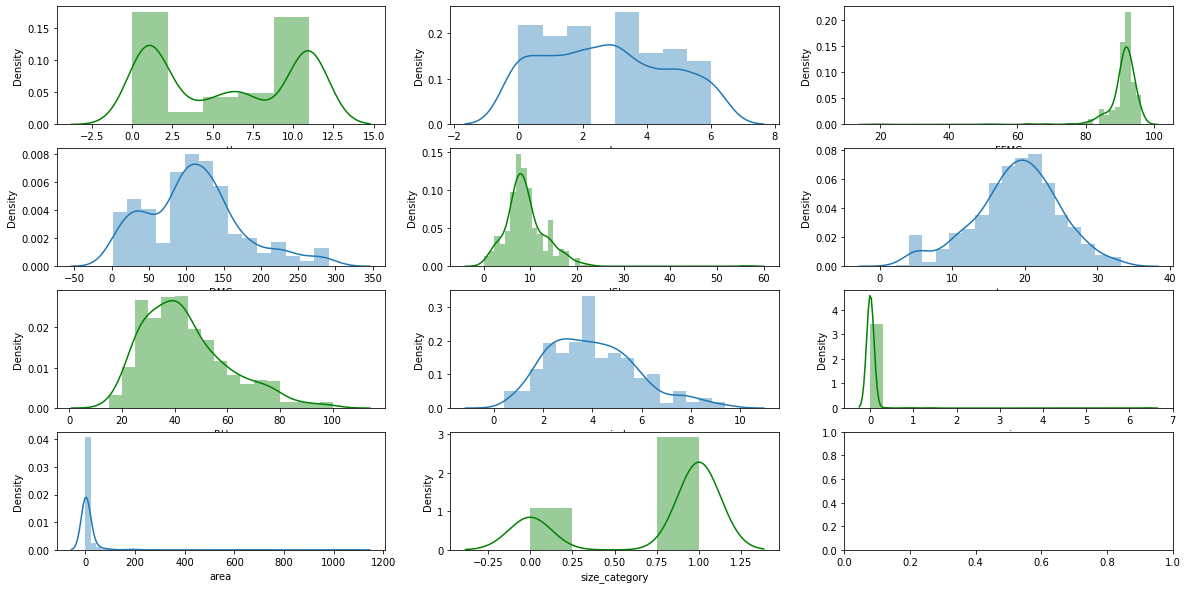

In [20]:
#checking normal distribution using distplot

fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.distplot(data.month,ax=ax[0,0],color='g')
sns.distplot(data.day,ax=ax[0,1])
sns.distplot(data.FFMC,ax=ax[0,2],color='g')
sns.distplot(data.DMC,ax=ax[1,0])
sns.distplot(data.ISI,ax=ax[1,1],color='g')
sns.distplot(data.temp,ax=ax[1,2])
sns.distplot(data.RH,ax=ax[2,0],color='g')
sns.distplot(data.wind,ax=ax[2,1])
sns.distplot(data.rain,ax=ax[2,2],color='g')
sns.distplot(data.area,ax=ax[3,0])
sns.distplot(data.size_category,ax=ax[3,1],color='g')


In [21]:
corr=data.corr()

In [25]:
abs(corr['size_category']).sort_values()

day              0.005360
ISI              0.007867
temp             0.009976
month            0.024288
FFMC             0.024292
DC               0.028372
RH               0.039730
DMC              0.046598
rain             0.053463
wind             0.059513
area             0.310561
size_category    1.000000
Name: size_category, dtype: float64

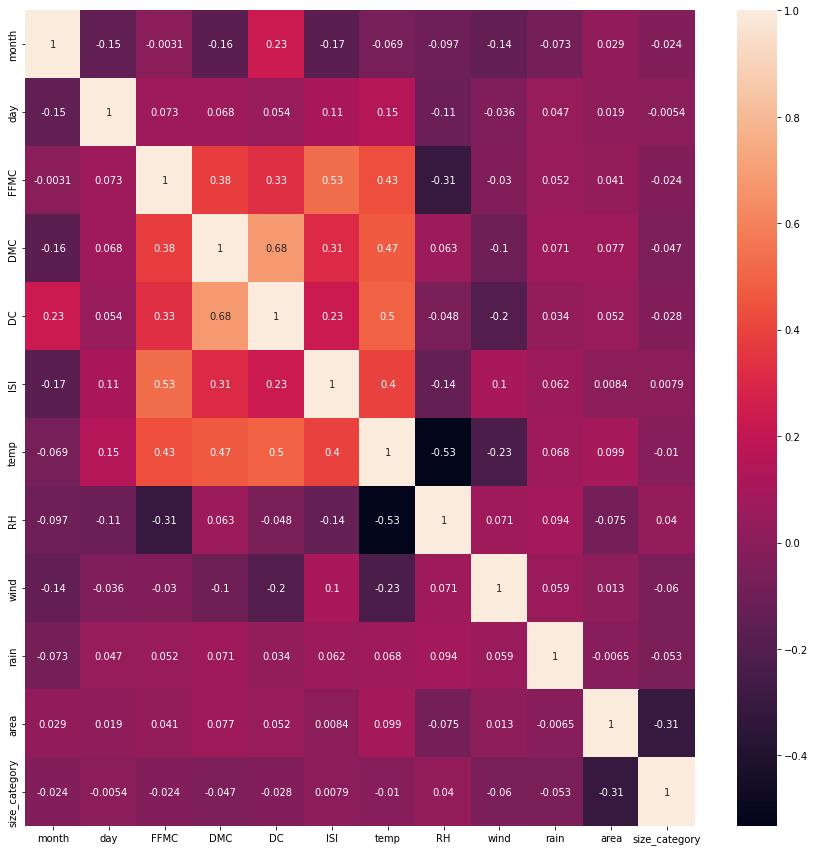

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

In [27]:
data['size_category'].value_counts()

1    371
0    138
Name: size_category, dtype: int64

In [43]:
#splitting data into x and y
x=data.drop('size_category',axis=1)
y=data['size_category']
print(x.info())
print(y.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   509 non-null    int64  
 1   day     509 non-null    int64  
 2   FFMC    509 non-null    float64
 3   DMC     509 non-null    float64
 4   DC      509 non-null    float64
 5   ISI     509 non-null    float64
 6   temp    509 non-null    float64
 7   RH      509 non-null    int64  
 8   wind    509 non-null    float64
 9   rain    509 non-null    float64
 10  area    509 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 47.7 KB
None
0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: int64


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda


In [45]:
#constructing sequential neural network
model=Sequential()
model.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model.add(Dense(8,kernel_initializer='random_normal', activation='linear'))
model.add(Dense(1,kernel_initializer='random_normal', activation='sigmoid'))

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [47]:
model.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)


Epoch 1/150
35/35 [==============================] - 1s 7ms/step - loss: 0.5796 - accuracy: 0.7478 - val_loss: 0.6765 - val_accuracy: 0.6726
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7566 - val_loss: 0.6382 - val_accuracy: 0.6726
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7566 - val_loss: 0.6189 - val_accuracy: 0.6726
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.5055 - accuracy: 0.7566 - val_loss: 0.5848 - val_accuracy: 0.6726
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.7566 - val_loss: 0.5748 - val_accuracy: 0.6726
Epoch 6/150
35/35 [==============================] - 0s 4ms/step - loss: 0.4606 - accuracy: 0.7595 - val_loss: 0.5835 - val_accuracy: 0.6845
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.7713 - val_loss: 0.5027 - val_accuracy: 0.6964
Epoch 8/150
3

In [48]:
#Evaluation of the model
score=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))


16/16 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9902
accuracy: 99.02%


In [49]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.0339 - accuracy: 0.9902
Accuracy: 99.02


In [50]:
history = model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)


Epoch 1/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 0.9702
Epoch 2/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 0.9643
Epoch 3/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9643
Epoch 4/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1321 - val_accuracy: 0.9464
Epoch 5/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9643
Epoch 6/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9643
Epoch 7/150
35/35 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0944 - val_accuracy: 0.9643
Epoch 8/150
3

In [51]:
model.history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

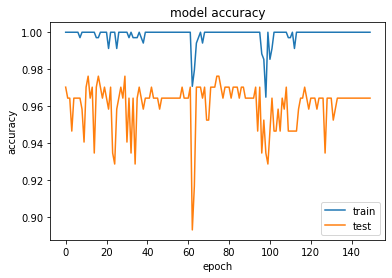

In [52]:
#visualising model history for train and test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

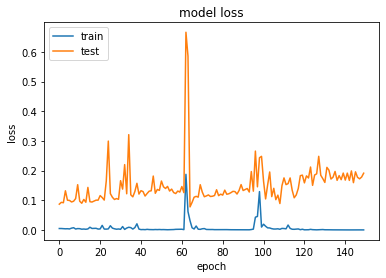

In [53]:
#visualising the model history for train and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()